In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
data = pd.read_csv("./data/salary2.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data2 = data.copy()

#### 분석목적: 학력, 교육연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
* 연봉이 5만달러 이상인지 아닌지
* age: 나이
* workclass: 고용형태
* education: 학력
* education-num: 교육연수
* marital-status: 혼인상태
* occupation: 직업
* relationship: 가족관계
* race: 인종
* sex: 성별
* capital-gain: 자산증가
* capital-loss: 자산감소
* hours-per-week: 주당 노동 시간
* native-country: 본국
* class: 연봉구분 - target(분석대상)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [5]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# 결측값 탐지

In [6]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [7]:
data.isna().sum() / len(data) * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [8]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [9]:
data[['workclass', 'class']].groupby('workclass').value_counts()

workclass         class
Federal-gov       <=50K      871
                  >50K       561
Local-gov         <=50K     2209
                  >50K       927
Never-worked      <=50K       10
Private           <=50K    26519
                  >50K      7387
Self-emp-inc      >50K       938
                  <=50K      757
Self-emp-not-inc  <=50K     2785
                  >50K      1077
State-gov         <=50K     1451
                  >50K       530
Without-pay       <=50K       19
                  >50K         2
Name: count, dtype: int64

# class를 숫자로 바꾸면 비율 계산이 편해지니 우선 숫자로 변환
* <=50 : 0, >50 : 1

In [10]:
data['class'] = data['class'].apply(lambda x: 1 if x == ">50k" else 0)
data['class']

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    0
Name: class, Length: 48842, dtype: int64

In [11]:
data = data.rename(columns={'class':'over50k'})
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50k
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [12]:
data[['workclass', 'over50k']].groupby('workclass').mean()

,over50k
workclass,
Federal-gov,0.0
Local-gov,0.0
Never-worked,0.0
Private,0.0
Self-emp-inc,0.0
Self-emp-not-inc,0.0
State-gov,0.0
Without-pay,0.0


* 위에서 apply를 이용해 인코딩 한 값이 제대로 나오지 않음??

In [13]:
data[data['over50k'] == 1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50k


* class 안에 있던 값에 공백이 포함되어 있어서 발생한 문제

In [14]:
data2['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
data2['class'] = data2['class'].apply(lambda x: 1 if x == ' >50K' else 0)
data2['class']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: class, Length: 48842, dtype: int64

In [16]:
data2[data2['class'] == 1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
10,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,1
14,48,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
48826,39,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,1
48835,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


* 데이터를 다시 로드해서 작업

In [17]:
data = pd.read_csv("./data/salary2.csv")
data2 = data.copy()

* 다른 컬럼도 공백으로 인한 문제가 생길 수 있으므로 공백 처리 함수 작성 후 적용

In [18]:
def clean(x):
    return x.strip()

In [19]:
# 결측값 때문에 처리 불가
for col in data:
    print(col, data[col].dtype)
    if data[col].dtype == 'object':
        data[col] = data[col].apply(clean)

age int64
workclass object


AttributeError: 'float' object has no attribute 'strip'

* 우선 class만 변환해서 결측값 처리 방법 결정

In [20]:
data['class'] = data['class'].apply(clean)
data['class']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: class, Length: 48842, dtype: object

In [21]:
data['class'] = data['class'].apply(lambda x: 1 if x == ">50K" else 0)
data[data['class'] == 1]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
10,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,1
14,48,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
48826,39,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,1
48835,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


class의 컬럼명을 over50k로 변경

In [22]:
data = data.rename(columns={'class':'over50k'})
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50k
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [128]:
data['over50k'].value_counts()

over50k
0    34014
1    11208
Name: count, dtype: int64

workclass가 결측인 사람이  소득 >50k 의 몇 %인지 확인 2.3%

In [23]:
data[(data['workclass'].isna()) & (data['over50k'] == 1)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50k
89,41,NaN,Masters,14,Married-civ-spouse,NaN,Wife,White,Female,7688,0,10,United-States,1
182,28,NaN,HS-grad,9,Married-civ-spouse,NaN,Own-child,White,Female,0,0,38,United-States,1
274,53,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,1
505,38,NaN,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,1887,10,United-States,1
781,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,5178,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48278,60,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,12,United-States,1
48279,52,NaN,12th,8,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,1
48297,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,1
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1


In [24]:
len(data[(data['workclass'].isna()) & (data['over50k'] == 1)]) / len(data[data['over50k'] == 1]) * 100

2.267476683494481

Occupation도 확인

In [25]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
over50k              0
dtype: int64

In [26]:
len(data[(data['occupation'].isna()) & (data['over50k'] == 1)])

265

In [27]:
len(data[(data['occupation'].isna()) & (data['over50k'] == 1)]) / len(data[data['over50k'] == 1]) * 100

2.267476683494481

workplace와 occupation이 동시에 na인 경우면서 연봉이 50k 초과인 경우<br>
workplace가 결측이면서 1인 경우와 occupation이 결측이면서 연봉이 50k초과인 경우와 같음

In [28]:
data[(data['workclass'].isna()) & (data['occupation'].isna()) & (data['over50k'] == 1)]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50k
89,41,NaN,Masters,14,Married-civ-spouse,NaN,Wife,White,Female,7688,0,10,United-States,1
182,28,NaN,HS-grad,9,Married-civ-spouse,NaN,Own-child,White,Female,0,0,38,United-States,1
274,53,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,1
505,38,NaN,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,1887,10,United-States,1
781,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,5178,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48278,60,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,12,United-States,1
48279,52,NaN,12th,8,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,1
48297,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,1
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1


* native-country도 확인

In [29]:
len(data[(data['native-country'].isna()) & (data['over50k'] == 1)]) / len(data[data['over50k'] == 1]) * 100

1.882433473089758

전체 데이터에서 workplace와 occupation은 거의 동시에 결측 연봉 50k 인경우가 같고<br>
전체 50k 초과자 중 비율이 2.3% 정도이므로 nan 값을 삭제 하는 방향으로 진행

In [30]:
data = data.dropna()
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50k
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [31]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
over50k           0
dtype: int64

# 이상값 탐지

In [32]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,over50k
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017,0.247844
std,13.217870,2.552881,7506.430084,404.956092,12.007508,0.431766
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [33]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'over50k'],
      dtype='object')

<Axes: >

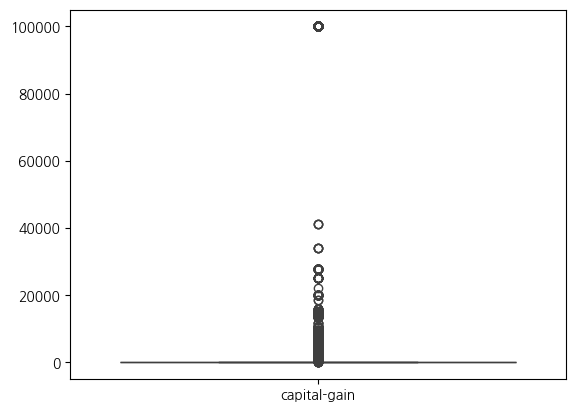

In [34]:
sns.boxplot(data[['capital-gain']])

<Axes: >

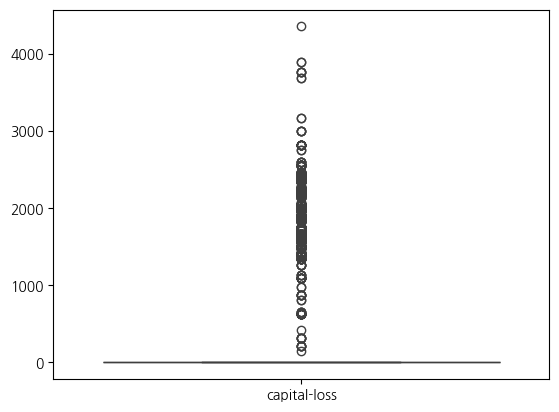

In [35]:
sns.boxplot(data[['capital-loss']])

<Axes: >

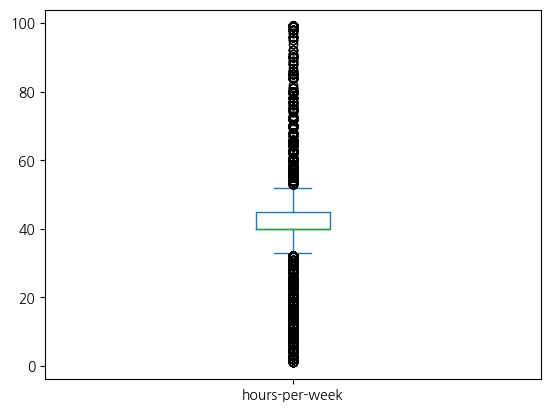

In [36]:
data['hours-per-week'].plot(kind='box')

* 재산 증가, 감소, 근로시간 등에서 이상값으로 나타나는 것들은 많지만 있을 수 있는 일들이므로 처리 X

In [37]:
data[data['capital-gain'] == data['capital-gain'].max()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50k
346,39,Private,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,1
357,50,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,1
418,54,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,1
692,41,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,1
702,43,State-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,99999,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47392,22,Self-emp-not-inc,Some-college,10,Never-married,Sales,Own-child,Black,Male,99999,0,55,United-States,1
48109,47,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,1
48253,43,Self-emp-inc,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,1
48519,47,Private,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,1


# EDA

범주형 컬럼과 수치형 컬럼을 나누어 분석

In [38]:
obj_cols = data.select_dtypes(include='object')
num_cols = data.select_dtypes(exclude='object')

In [39]:
obj_cols.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [40]:
important_cols = []
for col in obj_cols:
    print("="* 30, col, "="* 30)
    print(f"{col}, unique_values: {obj_cols[col].nunique()}")
    print(obj_cols[col].value_counts())
    
    print("="* 30, f"{col}_over50k_ratio", "="* 30)
    print(data[[col, 'over50k']].groupby(col).mean().sort_values(by='over50k', ascending=False))
    ratio_result = data[[col, 'over50k']].groupby(col).mean().sort_values(by='over50k', ascending=False)
    important_cols.append(ratio_result[ratio_result['over50k'] > 0.5].index)
    print("="* 70)

============================== workclass ==============================
workclass, unique_values: 7
workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64
============================== workclass_over50k_ratio ==============================
                   over50k
workclass                 
Self-emp-inc      0.554070
Federal-gov       0.390469
Local-gov         0.295161
Self-emp-not-inc  0.278978
State-gov         0.267215
Private           0.217702
Without-pay       0.095238
============================== education ==============================
education, unique_values: 16
education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676


In [41]:
important_cols

[Index([' Self-emp-inc'], dtype='object', name='workclass'),
 Index([' Prof-school', ' Doctorate', ' Masters'], dtype='object', name='education'),
 Index([], dtype='object', name='marital-status'),
 Index([], dtype='object', name='occupation'),
 Index([], dtype='object', name='relationship'),
 Index([], dtype='object', name='race'),
 Index([], dtype='object', name='sex'),
 Index([], dtype='object', name='native-country')]

============================== age ==============================
count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64


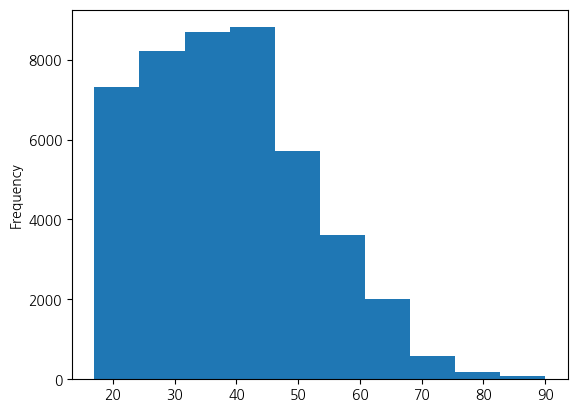

============================== age_over50k_ratio ==============================
      over50k
age          
50   0.436671
53   0.404935
51   0.404790
54   0.404110
46   0.403955
..        ...
18   0.000000
82   0.000000
86   0.000000
87   0.000000
89   0.000000

[74 rows x 1 columns]
============================== education-num ==============================
count    45222.000000
mean        10.118460
std          2.552881
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education-num, dtype: float64


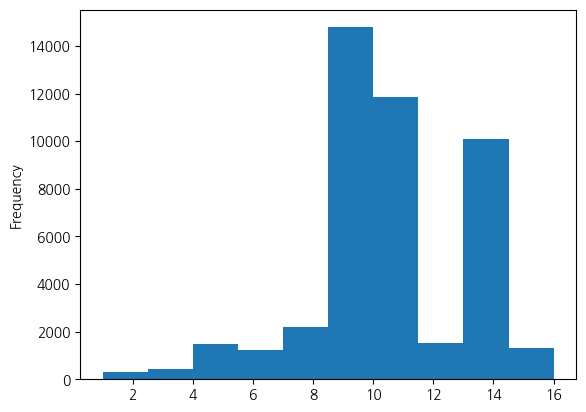

============================== education-num_over50k_ratio ==============================
                over50k
education-num          
15             0.754140
16             0.733456
14             0.554097
13             0.419815
12             0.264101
11             0.257274
10             0.201030
9              0.163431
8              0.074523
6              0.067048
4              0.066829
5              0.056213
7              0.054972
3              0.048998
2              0.036036
1              0.013889
============================== capital-gain ==============================
count    45222.000000
mean      1101.430344
std       7506.430084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


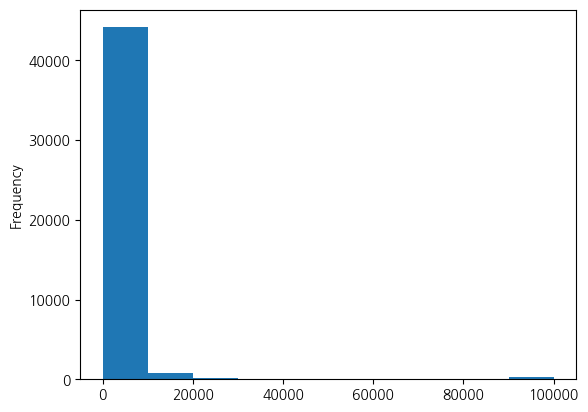

============================== capital-gain_over50k_ratio ==============================
              over50k
capital-gain         
7298              1.0
10605             1.0
15831             1.0
15024             1.0
15020             1.0
...               ...
7443              0.0
6849              0.0
22040             0.0
34095             0.0
41310             0.0

[121 rows x 1 columns]
============================== capital-loss ==============================
count    45222.000000
mean        88.595418
std        404.956092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


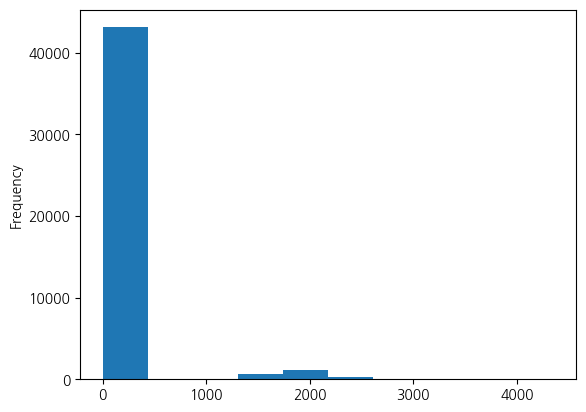

============================== capital-loss_over50k_ratio ==============================
              over50k
capital-loss         
1564              1.0
2174              1.0
2201              1.0
2231              1.0
2246              1.0
...               ...
2754              0.0
3175              0.0
3770              0.0
3900              0.0
4356              0.0

[97 rows x 1 columns]
============================== hours-per-week ==============================
count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


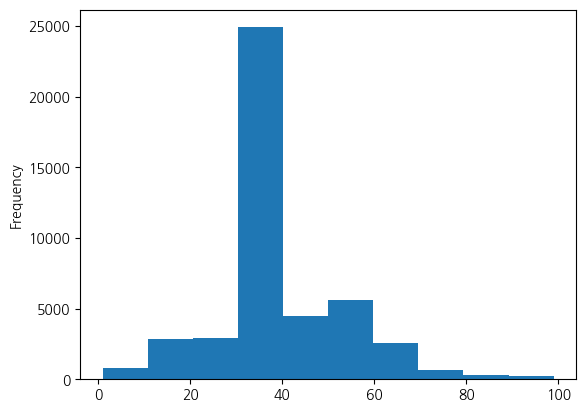

============================== hours-per-week_over50k_ratio ==============================
                 over50k
hours-per-week          
69              1.000000
61              0.750000
76              0.750000
74              0.666667
89              0.666667
...                  ...
82              0.000000
87              0.000000
88              0.000000
94              0.000000
91              0.000000

[96 rows x 1 columns]


In [42]:
for col in num_cols.iloc[:, :-1]:
    print("="* 30, col, "="* 30)
#     print(f"{col}, describe: {obj_cols[col].describe()}")
    print(num_cols[col].describe())
    num_cols[col].plot(kind='hist')
    plt.show()
    
    print("="* 30, f"{col}_over50k_ratio", "="* 30)
    print(data[[col, 'over50k']].groupby(col).mean().sort_values(by='over50k', ascending=False))
    ratio_result = data[[col, 'over50k']].groupby(col).mean().sort_values(by='over50k', ascending=False)
    important_cols.append(ratio_result[ratio_result['over50k'] > 0.4].index)
    print("="* 70)

In [45]:
data[data['hours-per-week'].isin([69, 61, 76, 74, 89, 67])]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50k
977,60,Self-emp-not-inc,9th,5,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,67,United-States,1
1102,33,Self-emp-not-inc,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,76,United-States,1
5613,33,Private,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,2354,0,61,United-States,0
7261,46,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,89,United-States,1
10715,41,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,61,United-States,1
12968,55,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,74,United-States,1
15001,54,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,67,United-States,0
15541,59,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,74,United-States,1
15873,36,Local-gov,HS-grad,9,Married-spouse-absent,Protective-serv,Not-in-family,White,Male,0,0,69,Germany,1
23423,48,Private,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,89,United-States,0


* 수치형 변수 상관관계 분석

In [46]:
num_cols.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,over50k
age,1.000000,0.037623,0.079683,0.059351,0.101992,0.237040
education-num,0.037623,1.000000,0.126907,0.081711,0.146206,0.332800
capital-gain,0.079683,0.126907,1.000000,-0.032102,0.083880,0.221034
capital-loss,0.059351,0.081711,-0.032102,1.000000,0.054195,0.148687
hours-per-week,0.101992,0.146206,0.083880,0.054195,1.000000,0.227199
over50k,0.237040,0.332800,0.221034,0.148687,0.227199,1.000000


수치형 변수들 간에 상관관계는 없어보임

<Axes: >

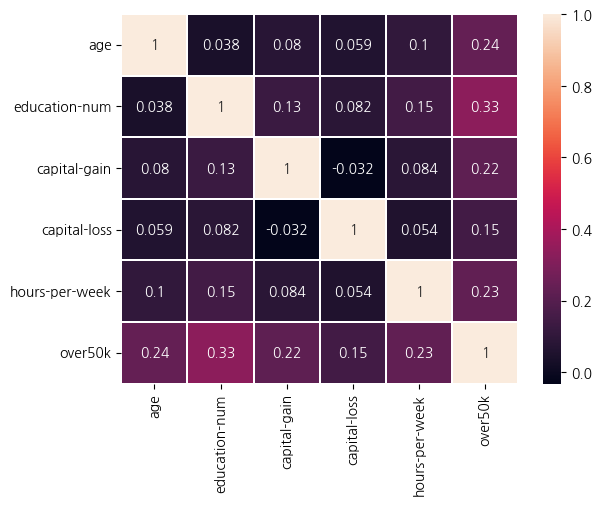

In [47]:
sns.heatmap(num_cols.corr(), annot=True, linewidth=0.2)

* 중요한 변수: 

In [43]:
important_cols

[Index([' Self-emp-inc'], dtype='object', name='workclass'),
 Index([' Prof-school', ' Doctorate', ' Masters'], dtype='object', name='education'),
 Index([], dtype='object', name='marital-status'),
 Index([], dtype='object', name='occupation'),
 Index([], dtype='object', name='relationship'),
 Index([], dtype='object', name='race'),
 Index([], dtype='object', name='sex'),
 Index([], dtype='object', name='native-country'),
 Index([50, 53, 51, 54, 46, 47], dtype='int64', name='age'),
 Index([15, 16, 14, 13], dtype='int64', name='education-num'),
 Index([ 7298, 10605, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 20051,
        25124, 25236, 27828, 99999, 18481,  8614,  9386,  4687,  4787,  5178,
         4934,  6418,  6514,  6097,  5556,  9562, 10520,  7262,  7688,  7430,
         3103,  4386,  7896],
       dtype='int64', name='capital-gain'),
 Index([1564, 2174, 2201, 2231, 2246, 2282, 2392, 2444, 2415, 2472, 3004, 1977,
        1911, 1887, 2547, 2824, 2559, 1848, 1755, 1825, 1902, 

In [48]:
final_cols = []
for col in important_cols:
    if len(col) != 0:
        print(col.name, col.values)
        final_cols.append(col.name)
final_cols

workclass [' Self-emp-inc']
education [' Prof-school' ' Doctorate' ' Masters']
age [50 53 51 54 46 47]
education-num [15 16 14 13]
capital-gain [ 7298 10605 15831 15024 15020 14344 14084 13550 11678 20051 25124 25236
 27828 99999 18481  8614  9386  4687  4787  5178  4934  6418  6514  6097
  5556  9562 10520  7262  7688  7430  3103  4386  7896]
capital-loss [1564 2174 2201 2231 2246 2282 2392 2444 2415 2472 3004 1977 1911 1887
 2547 2824 2559 1848 1755 1825 1902 1485  653 3683 2377 2258]
hours-per-week [69 61 76 74 89 67 86 95 97 55 50 60 57 90 65 80]


['workclass',
 'education',
 'age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

* education과 education-num 과의 관계 = 같음

In [50]:
data[['education', 'education-num']].value_counts()

education     education-num
HS-grad       9                14783
Some-college  10                9899
Bachelors     13                7570
Masters       14                2514
Assoc-voc     11                1959
11th          7                 1619
Assoc-acdm    12                1507
10th          6                 1223
7th-8th       4                  823
Prof-school   15                 785
9th           5                  676
12th          8                  577
Doctorate     16                 544
5th-6th       3                  449
1st-4th       2                  222
Preschool     1                   72
Name: count, dtype: int64

In [51]:
data['education'].value_counts()

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

In [52]:
data['education-num'].value_counts()

education-num
9     14783
10     9899
13     7570
14     2514
11     1959
7      1619
12     1507
6      1223
4       823
15      785
5       676
8       577
16      544
3       449
2       222
1        72
Name: count, dtype: int64

['workclass', 'education', 'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'] 중에서 <br>
['workclass', 'age', 'education-num', 'hours-per-week'] 만 사용

In [53]:
data_set1 = data[['workclass', 'age', 'education-num', 'hours-per-week', 'over50k']]
data_set1

,workclass,age,education-num,hours-per-week,over50k
0,Private,25,7,40,0
1,Private,38,9,50,0
2,Local-gov,28,12,40,1
3,Private,44,10,40,1
5,Private,34,6,30,0
...,...,...,...,...,...
48837,Private,27,12,38,0
48838,Private,40,9,40,1
48839,Private,58,9,40,0
48840,Private,22,9,20,0


In [54]:
X = data_set1.drop('over50k', axis=1)
y = data['over50k']

In [55]:
X = pd.get_dummies(X, drop_first=True)
X

,age,education-num,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,25,7,40,False,True,False,False,False,False
1,38,9,50,False,True,False,False,False,False
2,28,12,40,True,False,False,False,False,False
3,44,10,40,False,True,False,False,False,False
5,34,6,30,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
48837,27,12,38,False,True,False,False,False,False
48838,40,9,40,False,True,False,False,False,False
48839,58,9,40,False,True,False,False,False,False
48840,22,9,20,False,True,False,False,False,False


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [58]:
X_train

,age,education-num,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
15331,32,9,55,False,True,False,False,False,False
37036,19,10,35,False,True,False,False,False,False
39941,17,6,30,False,True,False,False,False,False
3262,54,13,35,False,True,False,False,False,False
25115,23,13,30,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
43252,38,9,40,False,True,False,False,False,False
30274,33,9,40,False,True,False,False,False,False
31544,49,5,40,False,True,False,False,False,False
43254,51,9,50,False,True,False,False,False,False


In [60]:
y_train.value_counts()

over50k
0    20434
1     6699
Name: count, dtype: int64

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [63]:
dtc = DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7600751838133672
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     13580
           1       0.53      0.37      0.43      4509

    accuracy                           0.76     18089
   macro avg       0.67      0.63      0.64     18089
weighted avg       0.74      0.76      0.74     18089



In [65]:
for i in range(1, 11):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print("="*30, f"max_depth: {i}", "="*30)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

============================== max_depth: 1 ==============================
0.7507324893581735
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13580
           1       0.00      0.00      0.00      4509

    accuracy                           0.75     18089
   macro avg       0.38      0.50      0.43     18089
weighted avg       0.56      0.75      0.64     18089


============================== max_depth: 2 ==============================
0.7783735972137763
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     13580
           1       0.57      0.48      0.52      4509

    accuracy                           0.78     18089
   macro avg       0.70      0.68      0.69     18089
weighted avg       0.77      0.78      0.77     18089


============================== max_depth: 3 ==============================
0.7847863342362762
              precision    recall  f1-score   support

       

C:\Users\haram\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\haram\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\haram\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

============================== max_depth: 5 ==============================
0.7935209243186467
              precision    recall  f1-score   support

           0       0.82      0.93      0.87     13580
           1       0.65      0.37      0.47      4509

    accuracy                           0.79     18089
   macro avg       0.73      0.65      0.67     18089
weighted avg       0.78      0.79      0.77     18089


============================== max_depth: 6 ==============================
0.7930233843772458
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     13580
           1       0.64      0.40      0.49      4509

    accuracy                           0.79     18089
   macro avg       0.73      0.66      0.68     18089
weighted avg       0.78      0.79      0.78     18089


============================== max_depth: 7 ==============================
0.7955110840842501
              precision    recall  f1-score   support

       

,importance
education-num,0.414012
age,0.364282
hours-per-week,0.163321
workclass_ Self-emp-inc,0.017163
workclass_ Self-emp-not-inc,0.017033
workclass_ Local-gov,0.010407
workclass_ Private,0.008263
workclass_ State-gov,0.005296
workclass_ Without-pay,0.000222


<Axes: >

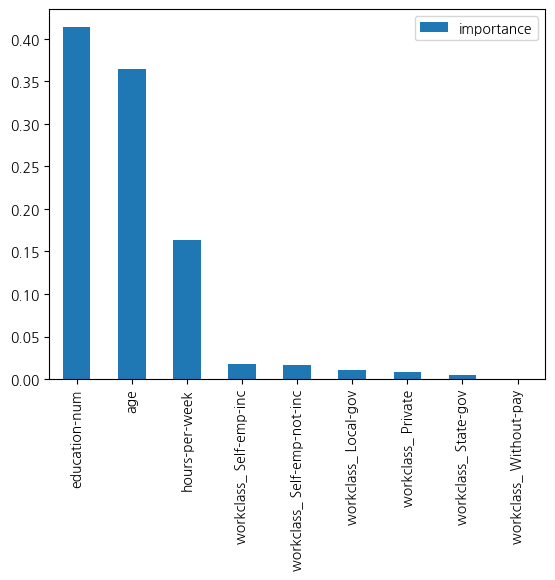

In [110]:
importance_result = pd.DataFrame([dtc.feature_importances_], columns=dtc.feature_names_in_).T
importance_result = importance_result.sort_values(by=0, ascending=False)
importance_result.columns = ['importance']
importance_result = importance_result[importance_result['importance'] > 0]
display(importance_result)
importance_result.plot(kind='bar')

* 변수를 추가한 데이터 세트로 다시 분석 

In [67]:
X2 = data[['workclass', 'education', 'age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

In [68]:
X2.head()

,workclass,education,age,education-num,capital-gain,capital-loss,hours-per-week
0,Private,11th,25,7,0,0,40
1,Private,HS-grad,38,9,0,0,50
2,Local-gov,Assoc-acdm,28,12,0,0,40
3,Private,Some-college,44,10,7688,0,40
5,Private,10th,34,6,0,0,30


In [70]:
X2 = pd.get_dummies(X2, drop_first=True)
X2

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,25,7,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,38,9,0,0,50,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,28,12,0,0,40,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,44,10,7688,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,34,6,0,0,30,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
48838,40,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
48839,58,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
48840,22,9,0,0,20,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [71]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.4, random_state=10)

In [72]:
X2_train

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
15331,32,9,0,0,55,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
37036,19,10,0,0,35,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
39941,17,6,594,0,30,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3262,54,13,0,0,35,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
25115,23,13,0,0,30,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43252,38,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
30274,33,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
31544,49,5,0,0,40,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
43254,51,9,7298,0,50,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [73]:
y2_train.value_counts()

over50k
0    20434
1     6699
Name: count, dtype: int64

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [75]:
dtc2 = DecisionTreeClassifier(random_state=10)
dtc2.fit(X2_train, y2_train)
pred2 = dtc2.predict(X2_test)
print(accuracy_score(y2_test, pred2))
print(classification_report(y2_test, pred2))

0.8025872076952845
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     13580
           1       0.64      0.48      0.55      4509

    accuracy                           0.80     18089
   macro avg       0.74      0.69      0.71     18089
weighted avg       0.79      0.80      0.79     18089



In [76]:
for i in range(1, 11):
    dtc2 = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc2.fit(X2_train, y2_train)
    pred2 = dtc2.predict(X2_test)
    print("="*30, f"max_depth: {i}", "="*30)
    print(accuracy_score(y2_test, pred2))
    print(classification_report(y2_test, pred2))
    print()

============================== max_depth: 1 ==============================
0.7926916910829787
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     13580
           1       0.94      0.18      0.30      4509

    accuracy                           0.79     18089
   macro avg       0.86      0.59      0.59     18089
weighted avg       0.82      0.79      0.73     18089


============================== max_depth: 2 ==============================
0.7926916910829787
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     13580
           1       0.94      0.18      0.30      4509

    accuracy                           0.79     18089
   macro avg       0.86      0.59      0.59     18089
weighted avg       0.82      0.79      0.73     18089


============================== max_depth: 3 ==============================
0.7976670904969871
              precision    recall  f1-score   support

       

,importance
capital-gain,0.379191
education-num,0.208015
age,0.190470
capital-loss,0.128459
hours-per-week,0.066478
workclass_ Self-emp-not-inc,0.009208
workclass_ Local-gov,0.004949
workclass_ Self-emp-inc,0.004014
workclass_ Private,0.002286
education_ Assoc-voc,0.001334


<Axes: >

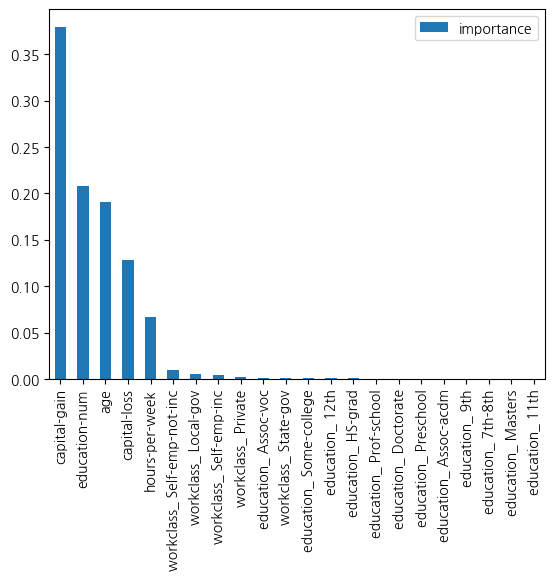

In [111]:
importance_result = pd.DataFrame([dtc2.feature_importances_], columns=dtc2.feature_names_in_).T
importance_result = importance_result.sort_values(by=0, ascending=False)
importance_result.columns = ['importance']
importance_result = importance_result[importance_result['importance'] > 0]
display(importance_result)
importance_result.plot(kind='bar')

* 전체 데이터로 다시 분석

In [78]:
X3 = data.drop('over50k', axis=1)
X3

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [81]:
X3 = pd.get_dummies(X3, drop_first=True)
X3

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,6,0,0,30,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,9,0,0,20,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [82]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.4, random_state=10)

In [83]:
X3_train

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
15331,32,9,0,0,55,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
37036,19,10,0,0,35,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
39941,17,6,594,0,30,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3262,54,13,0,0,35,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
25115,23,13,0,0,30,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43252,38,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
30274,33,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31544,49,5,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
43254,51,9,7298,0,50,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [84]:
y_train.value_counts()

over50k
0    20434
1     6699
Name: count, dtype: int64

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [85]:
dtc3 = DecisionTreeClassifier(random_state=10)
dtc3.fit(X3_train, y3_train)
pred3 = dtc3.predict(X3_test)
print(accuracy_score(y3_test, pred3))
print(classification_report(y3_test, pred3))

0.8133672397589695
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     13580
           1       0.63      0.60      0.62      4509

    accuracy                           0.81     18089
   macro avg       0.75      0.74      0.75     18089
weighted avg       0.81      0.81      0.81     18089



In [86]:
for i in range(1, 11):
    dtc3 = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc3.fit(X3_train, y3_train)
    pred3 = dtc3.predict(X3_test)
    print("="*30, f"max_depth: {i}", "="*30)
    print(accuracy_score(y3_test, pred3))
    print(classification_report(y3_test, pred3))
    print()

============================== max_depth: 1 ==============================
0.7507324893581735
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13580
           1       0.00      0.00      0.00      4509

    accuracy                           0.75     18089
   macro avg       0.38      0.50      0.43     18089
weighted avg       0.56      0.75      0.64     18089


============================== max_depth: 2 ==============================
0.8253634805683012
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     13580
           1       0.73      0.48      0.58      4509

    accuracy                           0.83     18089
   macro avg       0.79      0.71      0.73     18089
weighted avg       0.82      0.83      0.81     18089




C:\Users\haram\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\haram\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\haram\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

============================== max_depth: 3 ==============================
0.839018187848969
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     13580
           1       0.75      0.53      0.62      4509

    accuracy                           0.84     18089
   macro avg       0.80      0.74      0.76     18089
weighted avg       0.83      0.84      0.83     18089


============================== max_depth: 4 ==============================
0.8429432251644646
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     13580
           1       0.74      0.56      0.64      4509

    accuracy                           0.84     18089
   macro avg       0.81      0.75      0.77     18089
weighted avg       0.84      0.84      0.84     18089


============================== max_depth: 5 ==============================
0.8468682624799602
              precision    recall  f1-score   support

        

In [112]:
dtc3 = DecisionTreeClassifier(max_depth=8, random_state=10)
dtc3.fit(X3_train, y3_train)
pred3 = dtc3.predict(X3_test)
# print("="*30, f"max_depth: {i}", "="*30)
print(accuracy_score(y3_test, pred3))
print(classification_report(y3_test, pred3))
print()

0.8522859196196584
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     13580
           1       0.75      0.60      0.67      4509

    accuracy                           0.85     18089
   macro avg       0.82      0.77      0.79     18089
weighted avg       0.85      0.85      0.85     18089




,importance
marital-status_ Married-civ-spouse,0.418799
education-num,0.201720
capital-gain,0.196500
capital-loss,0.074506
age,0.047940
hours-per-week,0.018493
occupation_ Exec-managerial,0.016407
workclass_ Self-emp-not-inc,0.007829
relationship_ Wife,0.003649
sex_ Male,0.003157


<Axes: >

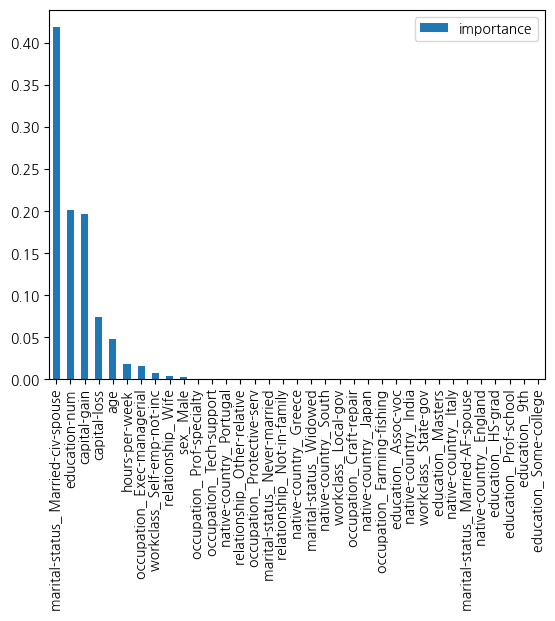

In [113]:
importance_result = pd.DataFrame([dtc3.feature_importances_], columns=dtc3.feature_names_in_).T
importance_result = importance_result.sort_values(by=0, ascending=False)
importance_result.columns = ['importance']
importance_result = importance_result[importance_result['importance'] > 0]
display(importance_result)
importance_result.plot(kind='bar')

In [114]:
from sklearn.tree import plot_tree

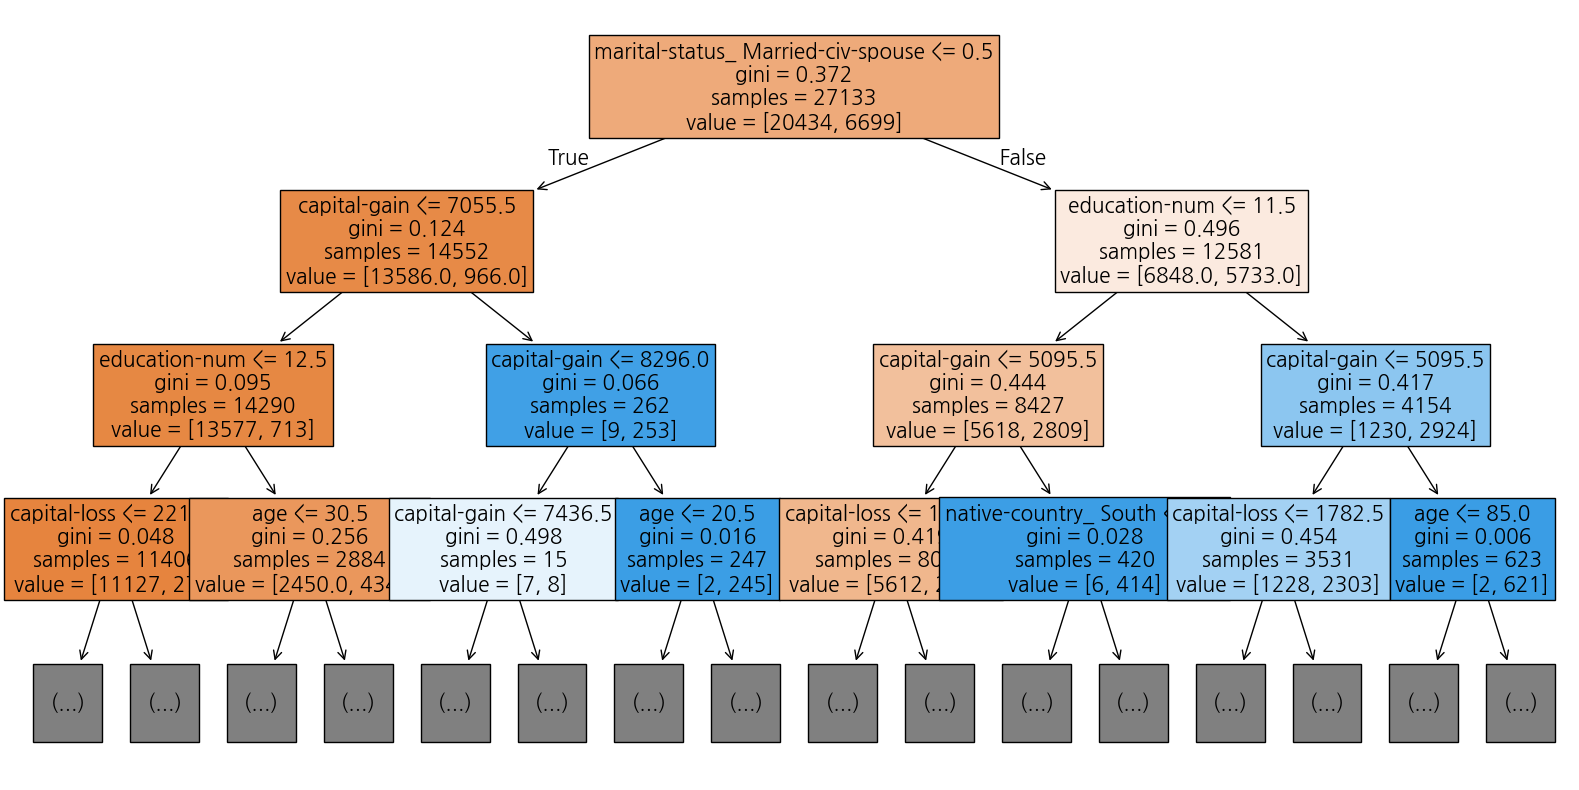

In [127]:
# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(dtc3, feature_names=dtc3.feature_names_in_, max_depth=3, fontsize=15, filled=True)
plt.show()